In [3]:
import pandas as pd
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb


In [52]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

In [5]:
train = pd.read_csv('/Users/grandmoon/Documents/kaggle/transformed/transformed_train.csv', index_col=False)

In [16]:
test = pd.read_csv('/Users/grandmoon/Documents/kaggle/transformed/transformed_test.csv')

In [17]:
test = test.drop('Unnamed: 0', axis=1)

In [6]:
train = train.drop('Unnamed: 0', axis=1)

In [38]:
train.head(20)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,SOURCES_PROD,CAR_TO_BIRTH_RATIO,CAR_TO_EMPLOY_RATIO,PHONE_TO_BIRTH_RATIO,PHONE_TO_EMPLOY_RATIO,DOC_IND_KURT,LIVE_IND_SUM,NEW_INC_BY_ORG,NEW_EXT_SOURCES_MEAN,NEW_SCORES_STD
0,1,2,1,2,0,202500.000,406597.5,24700.5,351000.0,7.0,...,0.003043,NaN,NaN,0.119860,1.780220,18.052632,7,157500.0,0.161787,0.092026
1,1,1,1,1,0,270000.000,1293502.5,35698.5,1129500.0,2.0,...,NaN,NaN,NaN,0.049389,0.696970,18.052632,6,135000.0,NaN,NaN
2,2,2,2,2,0,67500.000,135000.0,6750.0,135000.0,7.0,...,NaN,-0.001365,-0.115556,0.042791,3.622222,NaN,9,135000.0,NaN,NaN
3,1,1,1,2,0,135000.000,312682.5,29686.5,297000.0,7.0,...,NaN,NaN,NaN,0.032465,0.203027,18.052632,6,157500.0,NaN,NaN
4,1,2,1,2,0,121500.000,513000.0,21865.5,513000.0,7.0,...,NaN,NaN,NaN,0.055489,0.364055,18.052632,6,157500.0,NaN,NaN
5,1,2,1,2,0,99000.000,490495.5,27517.5,454500.0,6.0,...,NaN,NaN,NaN,0.149696,1.596977,18.052632,8,157500.0,NaN,NaN
6,1,1,2,2,1,171000.000,1560726.0,41301.0,1395000.0,7.0,...,0.276010,-0.001234,-0.005431,0.113369,0.499042,8.111111,8,157500.0,0.663607,0.150717
7,1,2,2,2,0,360000.000,1530000.0,42075.0,1530000.0,7.0,...,NaN,-0.000424,-0.017817,0.056764,2.383073,18.052632,8,157500.0,NaN,NaN
8,1,1,1,2,0,112500.000,1019610.0,33826.5,913500.0,1.0,...,0.090840,NaN,NaN,0.000000,NaN,18.052632,5,121500.0,0.514935,0.280096
9,2,2,1,2,0,135000.000,405000.0,20250.0,405000.0,7.0,...,NaN,NaN,NaN,0.115627,0.828628,NaN,6,157500.0,NaN,NaN


In [18]:
test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,SOURCES_PROD,CAR_TO_BIRTH_RATIO,CAR_TO_EMPLOY_RATIO,PHONE_TO_BIRTH_RATIO,PHONE_TO_EMPLOY_RATIO,DOC_IND_KURT,LIVE_IND_SUM,NEW_INC_BY_ORG,NEW_EXT_SOURCES_MEAN,NEW_SCORES_STD
0,1,1,1,2,0,135000.0,568800.0,20560.5,450000.0,7.0,...,0.094803,NaN,NaN,0.090432,0.747102,18.052632,7,126000.0,0.567263,0.353601
1,1,2,1,2,0,99000.0,222768.0,17370.0,180000.0,7.0,...,0.071345,NaN,NaN,0.000000,0.000000,18.052632,6,157500.0,0.429869,0.136694
2,1,2,2,2,0,202500.0,663264.0,69777.0,630000.0,NaN,...,NaN,-0.000250,-0.001122,0.042719,0.192014,18.052632,7,157500.0,NaN,NaN
3,1,1,1,2,2,315000.0,1575000.0,49018.5,1575000.0,7.0,...,0.164177,NaN,NaN,0.129150,0.967310,18.052632,7,157500.0,0.549372,0.055432
4,1,2,2,1,1,180000.0,625500.0,32067.0,625500.0,7.0,...,NaN,-0.001227,-0.007303,0.062960,0.374715,18.052632,7,157500.0,NaN,NaN


In [8]:
train.shape

(307511, 740)

In [8]:
target = pd.read_csv('/Users/grandmoon/Documents/kaggle/transformed/target.csv')

In [9]:
target = target.drop('Unnamed: 0', axis=1)

In [10]:
target.shape

(307511, 1)

In [11]:
target['x'].value_counts()

0    282686
1     24825
Name: x, dtype: int64

In [12]:
#Parameters for LightGBM
learning_rate = 0.05
n_trees = 350
objective = 'binary'
random = 4312

In [13]:
print("training now...")

training now...


In [14]:
gbm = lgb.LGBMClassifier(objective=objective,
                        learning_rate=learning_rate,
                        n_estimators=n_trees,
                        random_state=random)

In [15]:
gbm.fit(train, target, eval_metric='auc')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.05, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=350,
        n_jobs=-1, num_leaves=31, objective='binary', random_state=4312,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [21]:
y_pred = gbm.predict_proba(test)

In [29]:
y_pred.shape

(48744, 2)

In [27]:
sss = pd.read_csv('/Users/grandmoon/Documents/kaggle/application_test.csv')

In [28]:
sss.shape

(48744, 121)

In [31]:
submit = pd.DataFrame({'SK_ID_CURR': sss['SK_ID_CURR'], 'TARGET': y_pred[:,1]})

In [32]:
submit.to_csv('/Users/grandmoon/Documents/kaggle/submission.csv', index=False)

In [69]:
#function of plotting feature importance
def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    '''
    plot feature importances of a tree-based sklearn estimator
    
    Note: X_train and y_train are pandas DataFrames
    
    Note: Scikit-plot is a lovely package but I sometimes have issues
              1. flexibility/extendibility
              2. complicated models/datasets
          But for many situations Scikit-plot is the way to go
          see https://scikit-plot.readthedocs.io/en/latest/Quickstart.html
    
    Parameters
    ----------
        clf         (sklearn estimator) if not fitted, this routine will fit it
        
        X_train     (pandas DataFrame)
        
        y_train     (pandas DataFrame)  optional
                                        required only if clf has not already been fitted 
        
        top_n       (int)               Plot the top_n most-important features
                                        Default: 10
                                        
        figsize     ((int,int))         The physical size of the plot
                                        Default: (8,8)
        
        print_table (boolean)           If True, print out the table of feature importances
                                        Default: False
        
    Returns
    -------
        the pandas dataframe with the features and their importance
        
    Author
    ------
        George Fisher
    '''
    
    __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    from xgboost.core     import XGBoostError
    from lightgbm.sklearn import LightGBMError
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except (XGBoostError, LightGBMError, ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

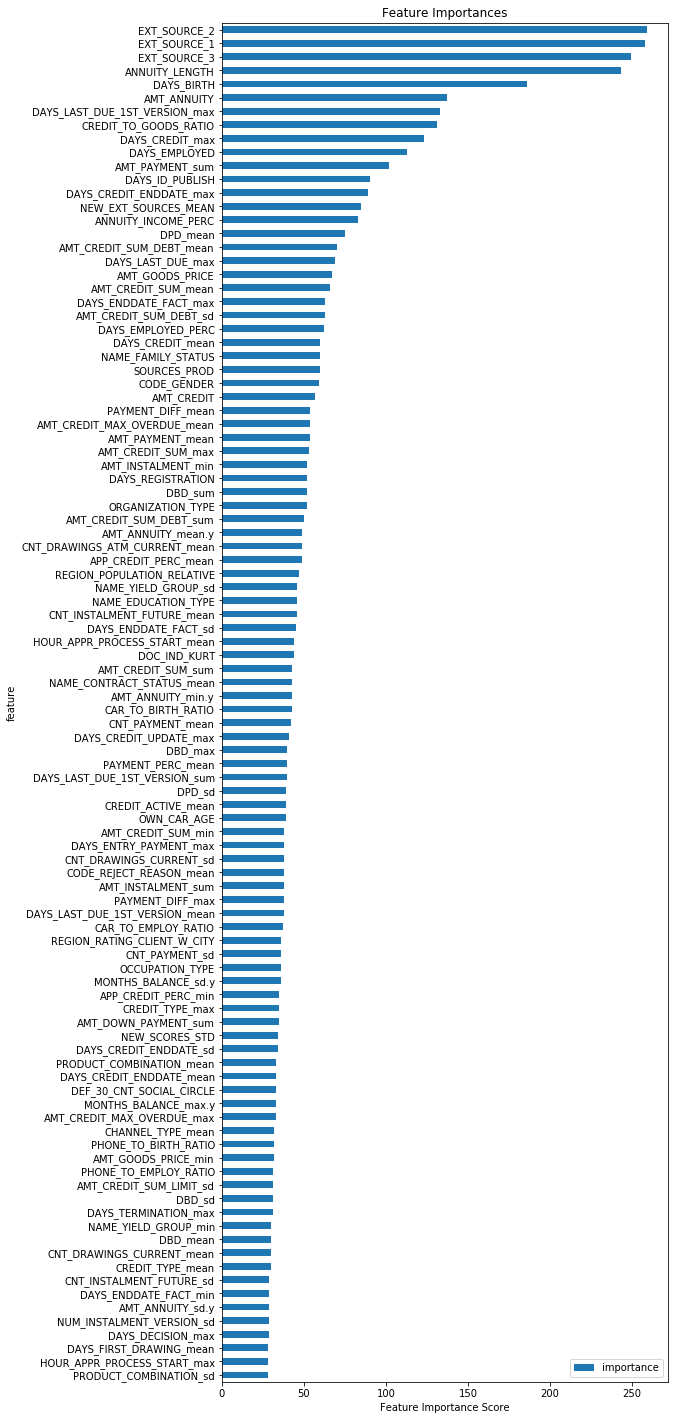

In [73]:
imp_var = plot_feature_importances(gbm, train, 
                             top_n=100, figsize=(8,25), print_table=False, title="Feature Importances")

In [80]:
filtered_imp_var = imp_var.loc[(imp_var['importance'] >= np.mean(imp_var['importance']))]

In [87]:
imp_features = filtered_imp_var.reset_index()
imp_features

fea_subset = imp_features['feature'].tolist()

In [89]:
train2 = train.loc[:, fea_subset]

In [91]:
train2.shape

(307511, 27)

In [96]:
# lightgbm on the important features
gbm_sub = lgb.LGBMClassifier(objective=objective,
                        learning_rate=learning_rate,
                        n_estimators=1000,
                        random_state=random,
                        class_weight='balanced')

In [97]:
gbm_sub.fit(train2, target, eval_metric='auc')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, learning_rate=0.05, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=1000, n_jobs=-1, num_leaves=31, objective='binary',
        random_state=4312, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [99]:
y_pred_sub = gbm_sub.predict_proba(test.loc[:, fea_subset])
submit_sub = pd.DataFrame({'SK_ID_CURR': sss['SK_ID_CURR'], 'TARGET': y_pred_sub[:,1]})
submit_sub.to_csv('/Users/grandmoon/Documents/kaggle/submission_sub.csv', index=False)

# A big model of LightGBM with 5k trees, max_depth=100

In [62]:
gbm_deep = lgb.LGBMClassifier(objective=objective,
                        learning_rate=learning_rate,
                        n_estimators=5000,
                        max_depth=100,
                        random_state=random)

In [63]:
gbm_deep.fit(train, target, eval_metric='auc')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.05, max_depth=100, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=5000,
        n_jobs=-1, num_leaves=31, objective='binary', random_state=4312,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [64]:
y_pred_deep = gbm_deep.predict_proba(test)
submit2 = pd.DataFrame({'SK_ID_CURR': sss['SK_ID_CURR'], 'TARGET': y_pred_deep[:,1]})
submit2.to_csv('/Users/grandmoon/Documents/kaggle/submission2.csv', index=False)

# Grid search cv

In [130]:
param_grid = {
    
    
    'n_estimators': [100, 400, 1000, 1500, 4000,10000],
    'max_depth': [2,4,6, -1]

}

In [131]:
est = lgb.LGBMClassifier(objective=objective, learning_rate = learning_rate, random_state=random)

In [132]:
gbm_cv = RandomizedSearchCV(est, param_grid, cv=5)

In [ ]:
gbm_cv.fit(train, target, eval_metric='auc')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklea

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklea

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packa

In [ ]:
gbm_cv.best_params_

In [113]:
gbm_best = gbm_cv.best_estimator_

In [115]:
y_pred_best = gbm_best.predict_proba(test.loc[:,fea_subset])
submit_best = pd.DataFrame({'SK_ID_CURR': sss['SK_ID_CURR'], 'TARGET': y_pred_best[:,1]})
submit_best.to_csv('/Users/grandmoon/Documents/kaggle/submission_best.csv', index=False)

# lightgbm based on https://www.kaggle.com/dromosys/fork-of-fork-lightgbm-with-simple-features-cee847/code

In [116]:
clf = lgb.LGBMClassifier(
            nthread=4,
            #is_unbalance=True,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=32,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.04,
            reg_lambda=0.073,
            min_split_gain=0.0222415,
            min_child_weight=40,
            silent=-1,
            verbose=-1,
            #scale_pos_weight=11
            )

In [118]:
clf.fit(train, target, 
            eval_metric= 'auc')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.9497036, learning_rate=0.02, max_depth=8,
        min_child_samples=20, min_child_weight=40,
        min_split_gain=0.0222415, n_estimators=10000, n_jobs=-1, nthread=4,
        num_leaves=32, objective=None, random_state=None, reg_alpha=0.04,
        reg_lambda=0.073, silent=-1, subsample=0.8715623,
        subsample_for_bin=200000, subsample_freq=0, verbose=-1)

In [119]:
y_pred_clf = clf.predict_proba(test)
submit_clf = pd.DataFrame({'SK_ID_CURR': sss['SK_ID_CURR'], 'TARGET': y_pred_clf[:,1]})
submit_clf.to_csv('/Users/grandmoon/Documents/kaggle/submission_clf.csv', index=False)

# lgbm CV

In [125]:
lgbm_train = lgb.Dataset(data=train,
                          label=target,
                          free_raw_data=False)

In [127]:
lgbm_params = {
    'boosting': 'lgbm',
    'application': 'binary',
    'learning_rate': 0.1,
    'min_data_in_leaf': 30,
    'num_leaves': 31,
    'max_depth': -1,
    'feature_fraction': 0.5,
    'scale_pos_weight': 2,
    'drop_rate': 0.02
}

cv_results = lgb.LGBMClassifier()

[50]	cv_agg's auc: 1 + 0


In [128]:
cv_results

{'auc-mean': [1.0], 'auc-stdv': [0.0]}